In [1]:
import os, pickle, time

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from my_util import *
from evaluation_function import *
from lime.lime.lime_tabular import LimeTabularExplainer

from pyexplainer.pyexplainer_pyexplainer import *

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

#importing my model 
from mohit_base_algorithm.pyexplainer_pyexplainer import *

# test if the evaluation_fuction file's latest version has been synced or not
test_file_sync()

Version 6.3.11:20:54


### Global model evaluation

In [2]:
get_global_model_evaluation_result('openstack')

RF global model result
AUC: 0.7468482561455155, F1: 0.35515695067264574, IFA: 244, Recall@20%Effort: 0.5619195046439629, Popt: 0.8247763516141581
              precision    recall  f1-score   support

       False       0.87      0.92      0.89      3317
        True       0.42      0.31      0.36       646

    accuracy                           0.82      3963
   macro avg       0.65      0.61      0.62      3963
weighted avg       0.80      0.82      0.81      3963

----------------------------------------------------------------------------------------------------
LR global model result
AUC: 0.6664985052142495, F1: 0.3596035865974517, IFA: 35, Recall@20%Effort: 0.5402476780185759, Popt: 0.8257826171495235
              precision    recall  f1-score   support

       False       0.89      0.67      0.77      3317
        True       0.26      0.59      0.36       646

    accuracy                           0.66      3963
   macro avg       0.58      0.63      0.56      3963
weighted a

In [3]:
get_global_model_evaluation_result('qt')

RF global model result
AUC: 0.7350656132213174, F1: 0.20954907161803715, IFA: 19, Recall@20%Effort: 0.8340336134453782, Popt: 0.9434782608695651
              precision    recall  f1-score   support

       False       0.95      0.97      0.96      7801
        True       0.28      0.17      0.21       476

    accuracy                           0.93      8277
   macro avg       0.62      0.57      0.59      8277
weighted avg       0.91      0.93      0.92      8277

----------------------------------------------------------------------------------------------------
LR global model result
AUC: 0.6446095038451222, F1: 0.15877957658779576, IFA: 7, Recall@20%Effort: 0.8172268907563025, Popt: 0.9467080745341614
              precision    recall  f1-score   support

       False       0.96      0.68      0.80      7801
        True       0.09      0.54      0.16       476

    accuracy                           0.67      8277
   macro avg       0.53      0.61      0.48      8277
weighted av

### RQ1 evaluation

In [5]:
rq1_eval('openstack', 'RF')
rq1_eval('qt', 'RF')
# generally takes about 2 minutes,  120 Seconds

finished RQ1 of openstack , globla model is RF
finished RQ1 of qt , globla model is RF


In [6]:
rq1_eval('openstack', 'LR')
rq1_eval('qt', 'LR')
# generally takes about 3.5 minutes,  210 Seconds

finished RQ1 of openstack , globla model is LR
finished RQ1 of qt , globla model is LR


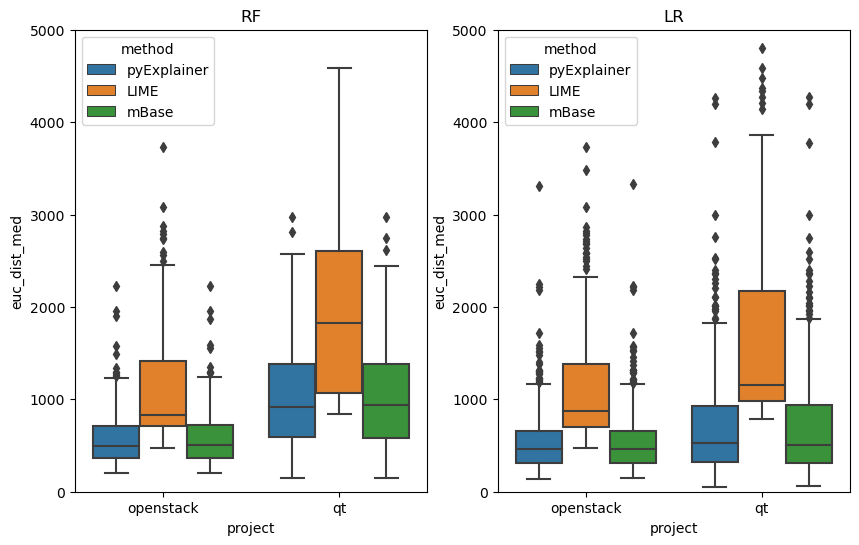

In [7]:
show_rq1_eval_result()
# generally takes about 1 minutes,  60 Seconds

### RQ2 evaluation

In [2]:
# rq2_eval('openstack','RF',debug=True)
# rq2_eval('qt','RF',debug=True)
rq2_eval('openstack','RF',debug=False)
rq2_eval('qt','RF',debug=False)

100%|██████████| 198/198 [02:22<00:00,  1.38it/s]


finished RQ2 of openstack


100%|██████████| 79/79 [00:58<00:00,  1.35it/s]


finished RQ2 of qt


In [3]:
rq2_eval('openstack','lr')
rq2_eval('qt','lr')

100%|██████████| 381/381 [04:24<00:00,  1.44it/s]


finished RQ2 of openstack


100%|██████████| 255/255 [03:13<00:00,  1.32it/s]


finished RQ2 of qt


#### Local model accuracy

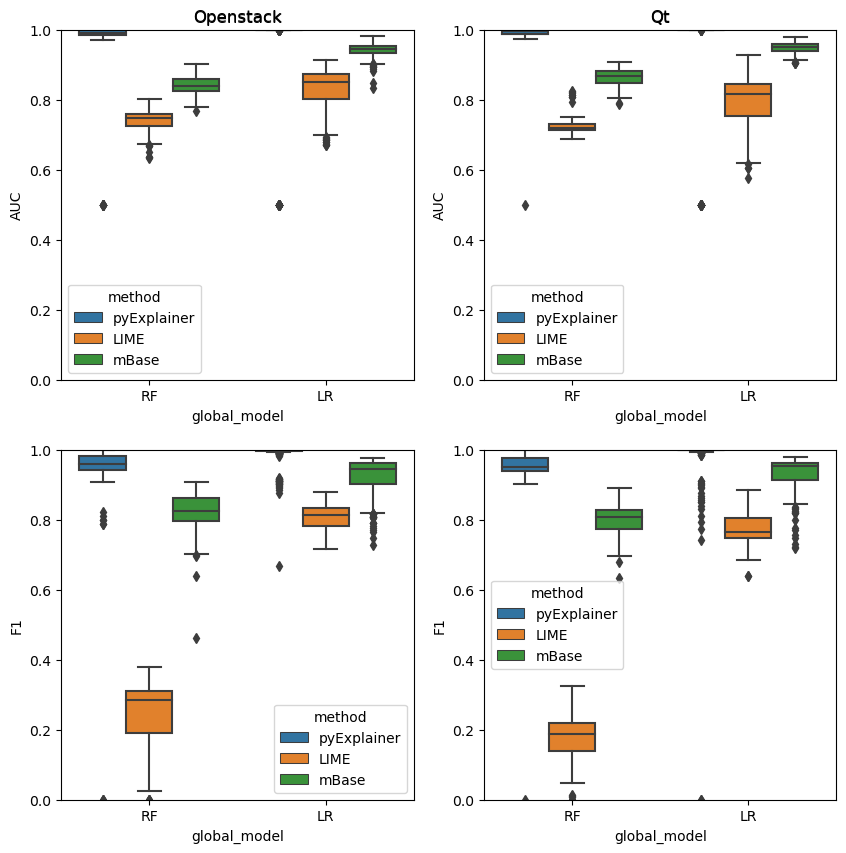

In [4]:
show_rq2_eval_result()

#### Probability distribution

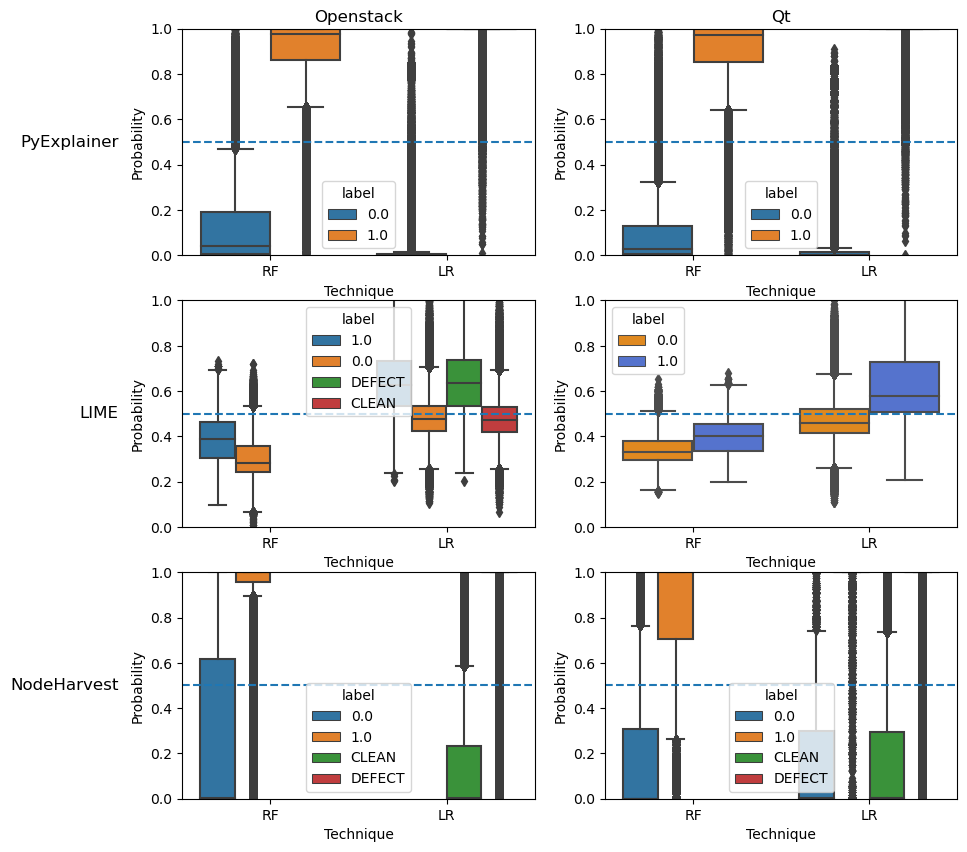

In [5]:
show_rq2_prob_distribution()

### RQ3 evaluation

In [2]:
start = time.time()
print('openstack')
rq3_eval('openstack','RF',debug=False)
end = time.time()
print('finished in',str(end-start), 'secs')

openstack


100%|██████████| 198/198 [26:12<00:00,  7.94s/it]

finished in 1572.875720500946 secs


In [ ]:
# kept this block for safety

In [3]:
start = time.time()
print('qt')
rq3_eval('qt','RF')
end = time.time()
print('finished in',str(end-start), 'secs')

start = time.time()
print('openstack')
rq3_eval('openstack','LR')
end = time.time()
print('finished in',str(end-start), 'secs')

start = time.time()
print('qt')
rq3_eval('qt','LR')
end = time.time()
print('finished in',str(end-start), 'secs')

qt


100%|██████████| 79/79 [20:40<00:00, 15.71s/it]


finished in 1241.8985531330109 secs
openstack


100%|██████████| 381/381 [37:44<00:00,  5.94s/it]


finished in 2264.9035065174103 secs
qt


100%|██████████| 255/255 [53:37<00:00, 12.62s/it]

finished in 3217.740923643112 secs


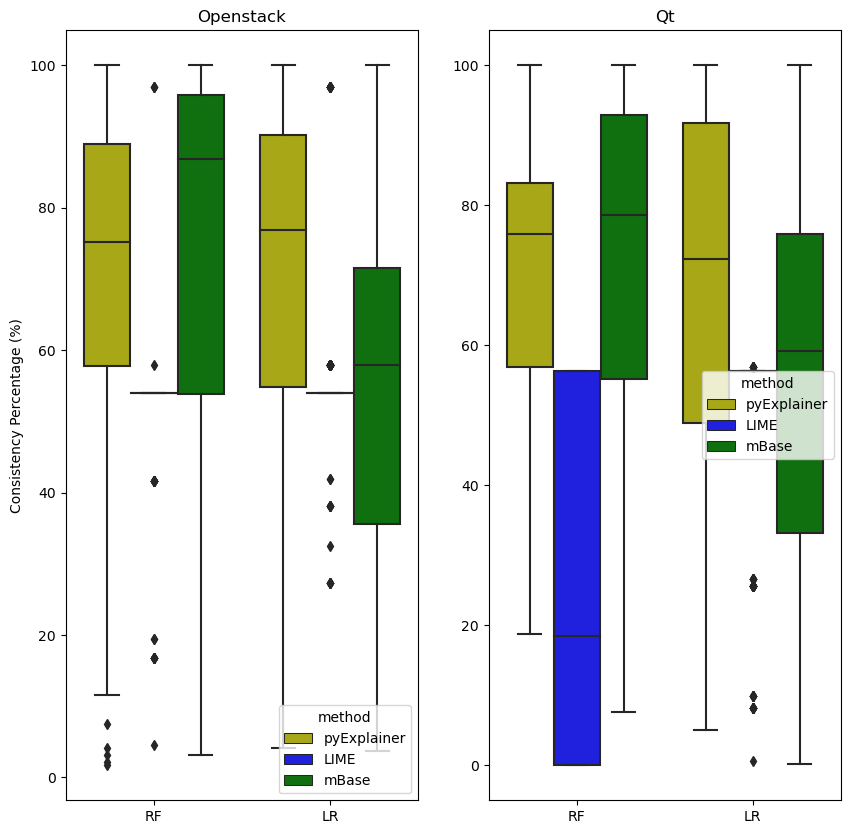

project: OpenStack, JIT model: RF, Agnostic: LIME
% unique explanation is 3.54
% duplicate explanation is 86
--------------------------------------------------
project: OpenStack, JIT model: RF, Agnostic: pyExplainer
% unique explanation is 79.07
% duplicate explanation is 4
--------------------------------------------------
project: OpenStack, JIT model: RF, Agnostic: NodeHarvest
% unique explanation is 48.67
% duplicate explanation is 11
--------------------------------------------------
project: OpenStack, JIT model: LR, Agnostic: LIME
% unique explanation is 1.84
% duplicate explanation is 71
--------------------------------------------------
project: OpenStack, JIT model: LR, Agnostic: pyExplainer
% unique explanation is 97.53
% duplicate explanation is 0
--------------------------------------------------
project: OpenStack, JIT model: LR, Agnostic: NodeHarvest
% unique explanation is 88.82
% duplicate explanation is 1
--------------------------------------------------
project: qt

In [2]:
show_rq3_eval_result()

# What-if analysis

In [ ]:
what_if_analysis('openstack','RF')
what_if_analysis('openstack','LR')
what_if_analysis('qt','RF')
what_if_analysis('qt','LR')

<Figure size 640x480 with 0 Axes>

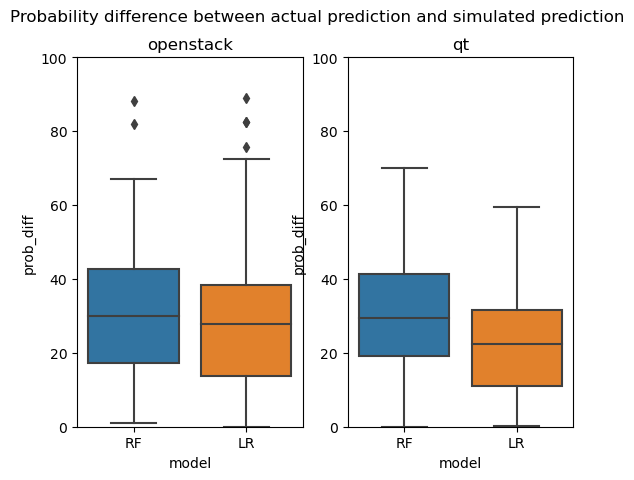

<Figure size 640x480 with 0 Axes>

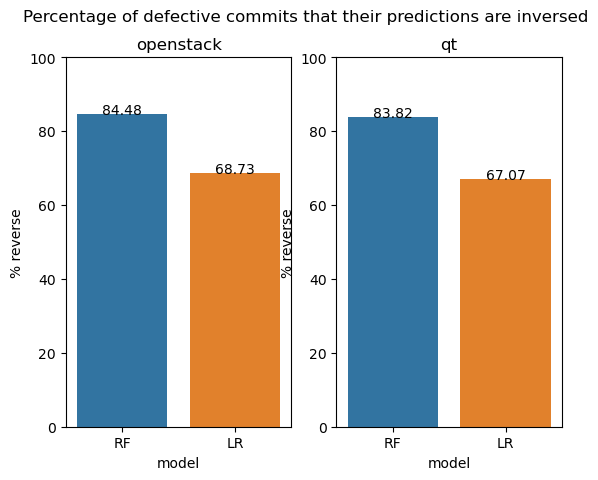

In [4]:
show_what_if_eval_result()